# Report project

This project was done in the scope of the CS-439 : Optimization for ML course. Moreover, the project was done by :  
- Brioschi Riccardo 
- Mossinelli Giacomo
- Havolli Albias 

### Import useful libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [58]:
import numpy as np
from datetime import datetime 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt
from cnn_architectures import *

In [18]:
# check device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Loading, reshaping and plotting  data

In [65]:
#load data
#transforms = transforms.Compose([transforms.Resize(32),
#                                 transforms.ToTensor])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)


#reshape it 
train_set = mnist_trainset.data.view(-1, 1, 28, 28).float()
test_set = mnist_testset.data.view(-1, 1, 28, 28).float()
train_target = mnist_trainset.targets
test_target = mnist_testset.targets

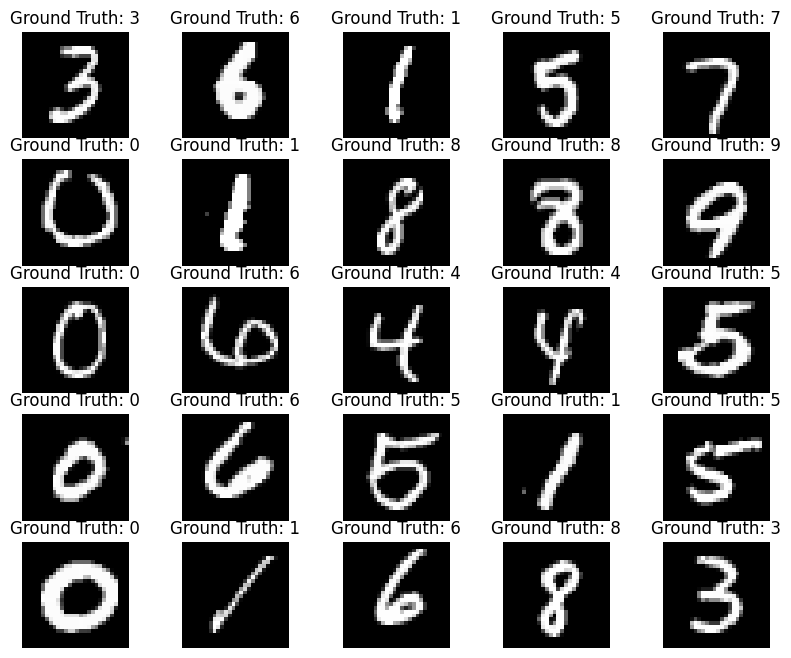

In [17]:
#plot some training examples with ground truth 
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img = train_set[sample_idx]
    label = train_target[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title("Ground Truth: {}".format(train_target[sample_idx]))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Model training

First, we train our model using LeNet5 (and then using AlexNet). The model was trained using batchez of size 100 and 150 epochs. Moreover, for each model, we use different optimizers : ...

In [ ]:
#define the nb. of epochs and batch size 
epochs = 150
batch_size = 100